# Plano.


O plano é fazer uma interpolação da malha estatistica do município do Rio de Janeiro para uma "malha hexagonal estátistica".


## Qual é a malha estatistica do Rio de Janeiro?


Primeiro, algumas importações:

In [2]:
import time
import xarray as xr
import geopandas as gpd
import matplotlib.pyplot as plt
import contextily as ctx


import libpysal
from tobler.util import h3fy
from tobler.area_weighted import area_interpolate
%load_ext watermark
%watermark -v -a "author: eli knaap" -d -u -p tobler,cenpy,geopandas

C:\Users\engce\anaconda3\Lib\site-packages\libpysal\cg\alpha_shapes.py:38: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  @jit
C:\Users\engce\anaconda3\Lib\site-packages\libpysal\cg\alpha_shapes.py:164: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  @jit
C:\Users\engce\anaconda3\Lib\site-packages\libpysal\cg\alpha_shapes.py:198: NumbaDeprecationWarning: The 'nopyt

Author: author: eli knaap

Last updated: 2023-09-01

Python implementation: CPython
Python version       : 3.11.4
IPython version      : 8.12.0

tobler   : 0.11.1
cenpy    : 1.0.1
geopandas: 0.13.2



### A famosa grade estátistica.

A grade estatística é dada no site do IBGE. Lá se encontra malha de todo o Brasil, uma malha que mede a estátistica de população por pequenos quadrados que encobre todo o Brasil. 

A parte da grade estatística que envolve o Rio de Janeiro é o que importa nesse notebook.

* A grade estátistica que pega o Rio de Janeiro, é a grade ID26. 

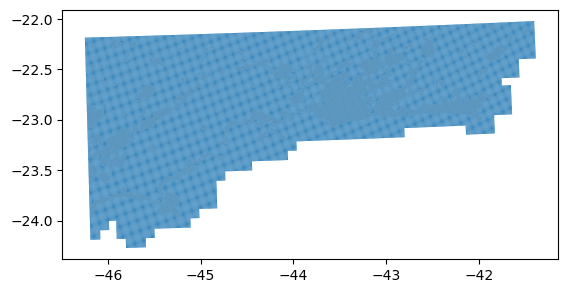

O tempo do código rodando é de 20.92 minutos.


In [3]:
time_inicial=time.time()

# Subindo o arquivo da grade estatística.
caminho = r"C:\Users\engce\grade_id26\grade_id26.dbf"

gdf = gpd.read_file(caminho)

# Plotar o GeoDataFrame
gdf.plot()
plt.show()

time_final=time.time()

print(f"O tempo do código rodando é de {(time_final-time_inicial)/60:.2f} minutos.")

In [ ]:
Esse mapa, ID26, é a área do Brasil que pega parte de São Paulo, parte de Minas Gerais e parte do Rio de Janeiro.


### Como delimitar a grade só para o munícipio?

In [ ]:
O gdf, o arquivo ID26, ele pega regiões além do necessário aqui. O ID26 cobre um pouco de São Paulo e Minas Gerais, aqui 
Vai ser usado apenas o município do Rio de Janeiro.

Observando o DataFrame da grade estátistica: 

In [4]:
gdf.head()

,ID_UNICO,nome_1KM,nome_5KM,nome_10KM,nome_50KM,nome_100KM,nome_500KM,QUADRANTE,MASC,FEM,POP,DOM_OCU,Shape_Leng,Shape_Area,geometry
0,200ME58000N86502,1KME5800N8650,5KME5800N8650,10KME5800N8650,50KME5800N8650,100KME5800N8650,500KME5800N8350,ID_26,0,0,0,0,0.007541,0.000004,"POLYGON ((-46.19208 -23.99930, -46.19214 -23.9..."
1,200ME58002N86502,1KME5800N8650,5KME5800N8650,10KME5800N8650,50KME5800N8650,100KME5800N8650,500KME5800N8350,ID_26,0,0,0,0,0.007541,0.000004,"POLYGON ((-46.19013 -23.99925, -46.19019 -23.9..."
2,200ME58004N86502,1KME5800N8650,5KME5800N8650,10KME5800N8650,50KME5800N8650,100KME5800N8650,500KME5800N8350,ID_26,0,0,0,0,0.007541,0.000004,"POLYGON ((-46.18818 -23.99920, -46.18824 -23.9..."
3,200ME58006N86502,1KME5800N8650,5KME5800N8650,10KME5800N8650,50KME5800N8650,100KME5800N8650,500KME5800N8350,ID_26,0,0,0,0,0.007540,0.000004,"POLYGON ((-46.18623 -23.99915, -46.18628 -23.9..."
4,200ME58008N86502,1KME5800N8650,5KME5800N8650,10KME5800N8650,50KME5800N8650,100KME5800N8650,500KME5800N8350,ID_26,0,0,0,0,0.007540,0.000004,"POLYGON ((-46.18428 -23.99910, -46.18433 -23.9..."


<Axes: >

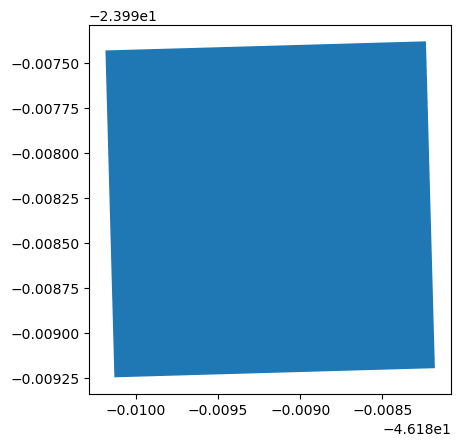

In [5]:
gdf.query('ID_UNICO=="200ME58002N86502"').plot()

No caso, como previsto, cada linha representa um quadrado. **Quadrado da Grade Estatística. **

Portanto, é melhor pegar um mapa que tenha o município bem definido.

<Axes: >

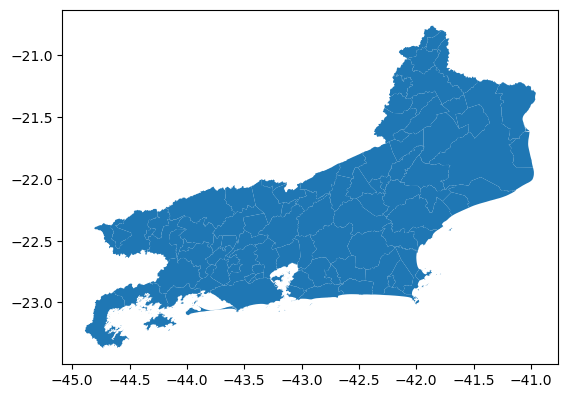

In [6]:
#Subindo o arquivo.
malha= "C:\\Users\\engce\\RJ_Municipios_2022.zip"
malha_rj = gpd.read_file(malha)
malha_rj.plot()

Esse mapa é disponibilizado pelo IBGE. Ele é a demarcação do Estado do Rio de Janeiro, contendo as **delimitações entre os municípios.**

In [7]:
#observando o GeoDataFrame. 
malha_rj.head()

,CD_MUN,NM_MUN,SIGLA_UF,AREA_KM2,geometry
0,3300100,Angra dos Reis,RJ,813.420,"MULTIPOLYGON (((-44.51649 -23.03589, -44.51633..."
1,3300159,Aperibé,RJ,94.542,"POLYGON ((-42.11437 -21.61204, -42.11394 -21.6..."
2,3300209,Araruama,RJ,638.276,"POLYGON ((-42.28399 -22.93928, -42.28444 -22.9..."
3,3300225,Areal,RJ,110.724,"POLYGON ((-43.09004 -22.23844, -43.09135 -22.2..."
4,3300233,Armação dos Búzios,RJ,70.977,"MULTIPOLYGON (((-41.91872 -22.77162, -41.91854..."


<Axes: >

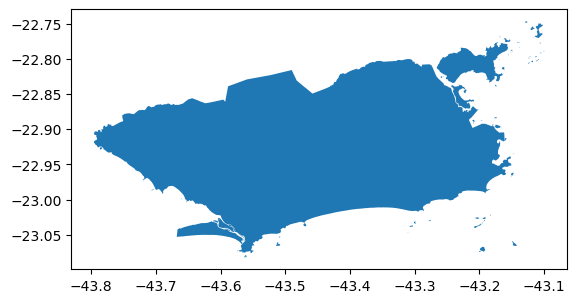

In [8]:
#Usando query para pegar só o município desejado.
malha_rj.query('NM_MUN=="Rio de Janeiro"').plot()


### O formato do município está bem definido, é possível usá-lo?

A ideia é pegar dentro do gdf (Dentro da grade estatística) só os dados que estão dellimitados pelo munícipio do Rio de Janeiro.

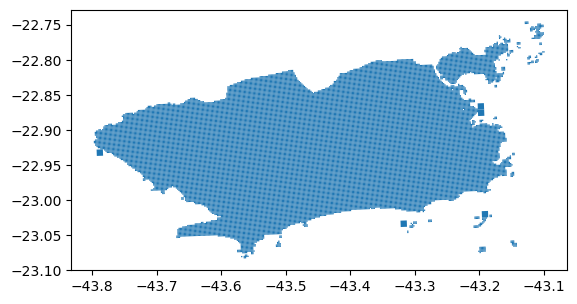

In [9]:
tempo_1=time.time()
# Filtrar o GeoDataFrame gdf usando a geometria/limite do município do Rio de Janeiro.
resultado = gdf[gdf.geometry.intersects(malha_rj.query('NM_MUN=="Rio de Janeiro"').geometry.iloc[0])]

# Plotanto o mapa.
resultado.plot()
tempo_2=time.time()

In [10]:
print(f"O mapa da grade estatistica delimitada pelo municipio do Rio de Janeiro durou {(tempo_2-tempo_1)/60:.2f} minutos para carregar.")

O mapa da grade estatistica delimitada pelo municipio do Rio de Janeiro durou 43.29 minutos para carregar.


### Pronto! Já se tem o mapa a ser explorado. 

Agora com esse mapa é possível fazer a interpolação. 

In [11]:
#Observar o GeoDataFrame.
resultado.head()

,ID_UNICO,nome_1KM,nome_5KM,nome_10KM,nome_50KM,nome_100KM,nome_500KM,QUADRANTE,MASC,FEM,POP,DOM_OCU,Shape_Leng,Shape_Area,geometry
179869,200ME60498N87608,1KME6049N8760,5KME6045N8760,10KME6040N8760,50KME6000N8750,100KME6000N8750,500KME5800N8350,ID_26,0,0,0,0,0.00751,0.000004,"POLYGON ((-43.79533 -22.92316, -43.79540 -22.9..."
179874,200ME60498N87610,1KME6049N8760,5KME6045N8760,10KME6040N8760,50KME6000N8750,100KME6000N8750,500KME5800N8350,ID_26,0,0,0,0,0.00751,0.000004,"POLYGON ((-43.79540 -22.92135, -43.79547 -22.9..."
179878,200ME60496N87612,1KME6049N8761,5KME6045N8760,10KME6040N8760,50KME6000N8750,100KME6000N8750,500KME5800N8350,ID_26,0,0,0,0,0.00751,0.000004,"POLYGON ((-43.79741 -22.91960, -43.79749 -22.9..."
179879,200ME60498N87612,1KME6049N8761,5KME6045N8760,10KME6040N8760,50KME6000N8750,100KME6000N8750,500KME5800N8350,ID_26,0,0,0,0,0.00751,0.000004,"POLYGON ((-43.79547 -22.91954, -43.79554 -22.9..."
179883,200ME60496N87614,1KME6049N8761,5KME6045N8760,10KME6040N8760,50KME6000N8750,100KME6000N8750,500KME5800N8350,ID_26,0,0,0,0,0.00751,0.000004,"POLYGON ((-43.79749 -22.91779, -43.79756 -22.9..."


## Como interpolar a geometria?

É possível, inicialmente, transformar a grade estátistica/quadrados em uma malha formada por hexagonos. 

In [12]:
#importando h3, para transformar os hexagonos.
import h3

#Modificando o objeto. 
dc_hex = h3fy(resultado)

A partir de aqui, é análogo ao tutorial da biblioteca Pysal(https://pysal.org/tobler/notebooks/census_to_hexgrid.html). 

C:\Users\engce\anaconda3\Lib\site-packages\contextily\tile.py:581: UserWarning: The inferred zoom level of 28 is not valid for the current tile provider (valid zooms: 0 - 20).
  warnings.warn(msg)


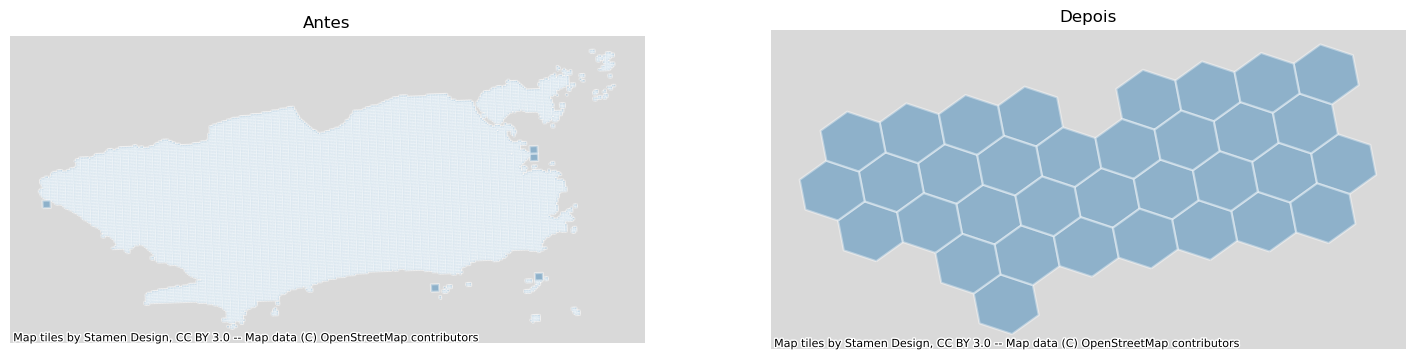

In [13]:

fig, axs = plt.subplots(1,2, figsize=(18,10))
axs=axs.flatten()
#plotando os mapas.
resultado.plot(ax=axs[0], alpha=0.4, linewidth=1.6, edgecolor='white')
dc_hex.plot(ax=axs[1], alpha=0.4, linewidth=1.6, edgecolor='white')
#Colocanto títulos.
axs[0].set_title('Antes')
axs[1].set_title('Depois')

for i,_ in enumerate(axs):
    ctx.add_basemap(axs[i], source=ctx.providers.Stamen.TonerLite)
    axs[i].axis('off')

### Esse é o mapa objetificado? 

Sim e não, a escala está interpolada, **os dados dentro da escala, não. 

Agora, é interessante observar a geometria. 

In [14]:
#Testando a resolução.
dc_hex_large = h3fy(resultado, resolution=5)
dc_hex_small = h3fy(resultado, resolution=7)

C:\Users\engce\anaconda3\Lib\site-packages\contextily\tile.py:581: UserWarning: The inferred zoom level of 29 is not valid for the current tile provider (valid zooms: 0 - 20).
  warnings.warn(msg)
C:\Users\engce\anaconda3\Lib\site-packages\contextily\tile.py:581: UserWarning: The inferred zoom level of 28 is not valid for the current tile provider (valid zooms: 0 - 20).
  warnings.warn(msg)


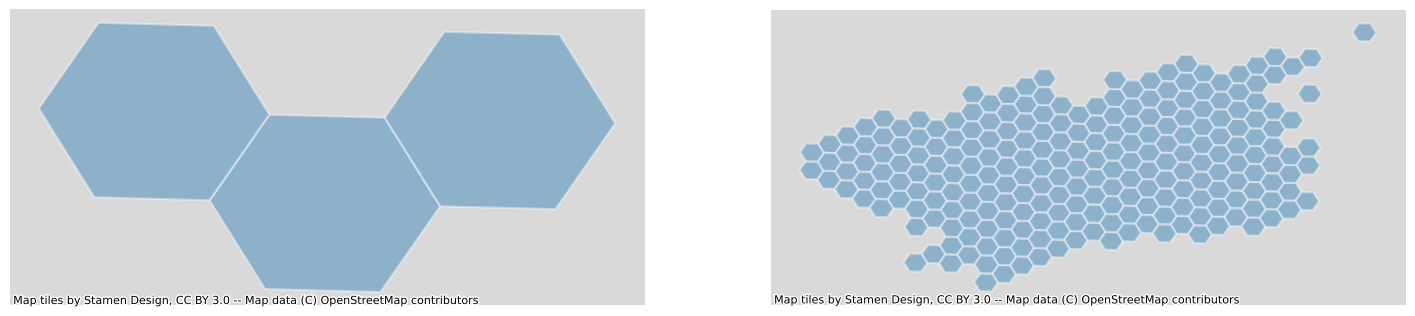

In [16]:

fig, axs = plt.subplots(1,2, figsize=(18,10))
#Aqui é plotado os hexagonos com resolução modificada.
dc_hex_large.plot(ax=axs[0], alpha=0.4, linewidth=1.6, edgecolor='white')
dc_hex_small.plot(ax=axs[1], alpha=0.4, linewidth=1.6, edgecolor='white')

for ax in axs:
    ctx.add_basemap(ax=ax, source=ctx.providers.Stamen.TonerLite)
    ax.axis('off')

### É viável fazer mais um teste. 

O tempo do código rodando é de 0.21 minutos.


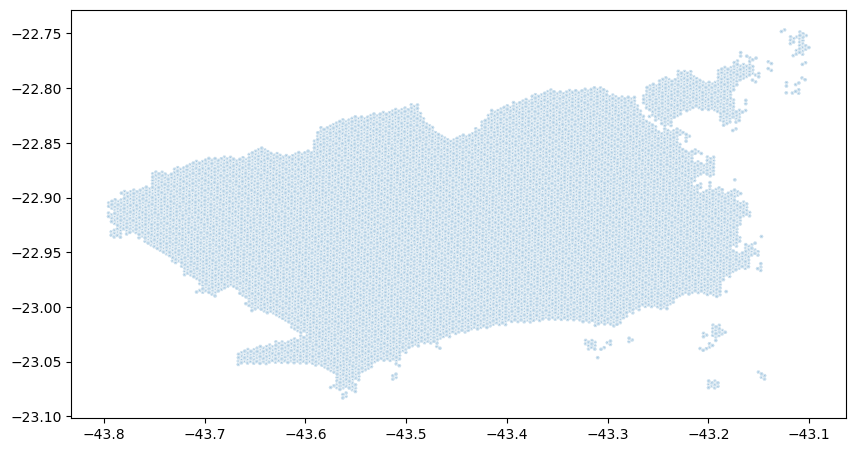

In [19]:

tempo_3=time.time()
#definindo a figura.
fig, ax = plt.subplots(figsize=(10, 10))
# Escolhendo a resolução do mapa.
teste=h3fy(resultado, resolution=9)
# Por fim, plote.
teste.plot(ax=ax, alpha=0.4, linewidth=1.6, edgecolor='white')

tempo_4=time.time()

print(f'O tempo do código rodando é de {(tempo_4-tempo_3)/60:.2f} minutos.')


In [20]:
#novamente com a resolução 5.
dc_hex_clipped = h3fy(resultado, resolution=5, clip=True)

C:\Users\engce\anaconda3\Lib\site-packages\tobler\util\util.py:155: UserWarning: CRS mismatch between the CRS of left geometries and the CRS of right geometries.
Use `to_crs()` to reproject one of the input geometries to match the CRS of the other.

Left CRS: EPSG:4326
Right CRS: EPSG:4674

  hexagons = geopandas.clip(hexagons, clipper)


C:\Users\engce\anaconda3\Lib\site-packages\contextily\tile.py:581: UserWarning: The inferred zoom level of 29 is not valid for the current tile provider (valid zooms: 0 - 20).
  warnings.warn(msg)


(-43.730238639336974,
 -43.178430725777964,
 -23.078873047449967,
 -22.82618651084941)

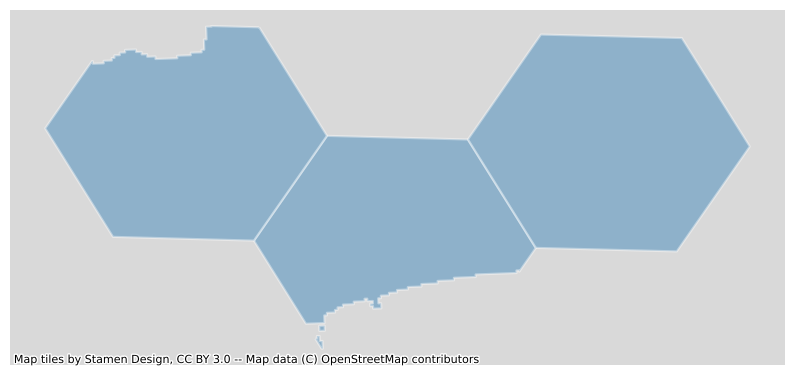

In [25]:
#Aqui, com resolução 5, um só gráfico. 

fig, ax = plt.subplots(figsize=(10,10))

dc_hex_clipped.plot(ax=ax, alpha=0.4, linewidth=1.6, edgecolor='white')
ctx.add_basemap(ax=ax, source=ctx.providers.Stamen.TonerLite)
ax.axis('off')

# Mas é os/as dados/informações?

In [ ]:
Vale tentar observar se os dados da grade estatística permanecem.

In [32]:
dc_hex.head()


,geometry
hex_id,
86a8a061fffffff,"POLYGON ((-43.27467 -22.90000, -43.24548 -22.8..."
86a8a0657ffffff,"POLYGON ((-43.38139 -22.86474, -43.35220 -22.8..."
86a8a076fffffff,"POLYGON ((-43.51460 -23.03497, -43.48540 -23.0..."
86a8a074fffffff,"POLYGON ((-43.49178 -22.98133, -43.46258 -22.9..."
86a8a0617ffffff,"POLYGON ((-43.23270 -22.94446, -43.20351 -22.9..."


**A unica coisa que contém, é a geometria

### Agora é importante interpolar os dados para a geometria.

A geometria já está interpolada, agora **vale interpolar os dados para o "novo ambiente".

In [22]:
#O novo ambiente para a coluna MASC.
dc_hex_interpolated = area_interpolate(source_df=resultado, target_df=dc_hex, intensive_variables=['MASC'])



C:\Users\engce\AppData\Local\Temp\ipykernel_18288\2841179774.py:2: UserWarning: Geometry is in a geographic CRS. Results from 'area' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  dc_hex_interpolated = area_interpolate(source_df=resultado, target_df=dc_hex, intensive_variables=['MASC'])


C:\Users\engce\anaconda3\Lib\site-packages\mapclassify\classifiers.py:257: UserWarning: Not enough unique values in array to form 5 classes. Setting k to 4.
  warnings.warn(
C:\Users\engce\anaconda3\Lib\site-packages\contextily\tile.py:581: UserWarning: The inferred zoom level of 28 is not valid for the current tile provider (valid zooms: 0 - 20).
  warnings.warn(msg)


Text(0.5, 0.98, 'Spatial Interpolation with the PySAL $\\mathtt{tobler}$ package')

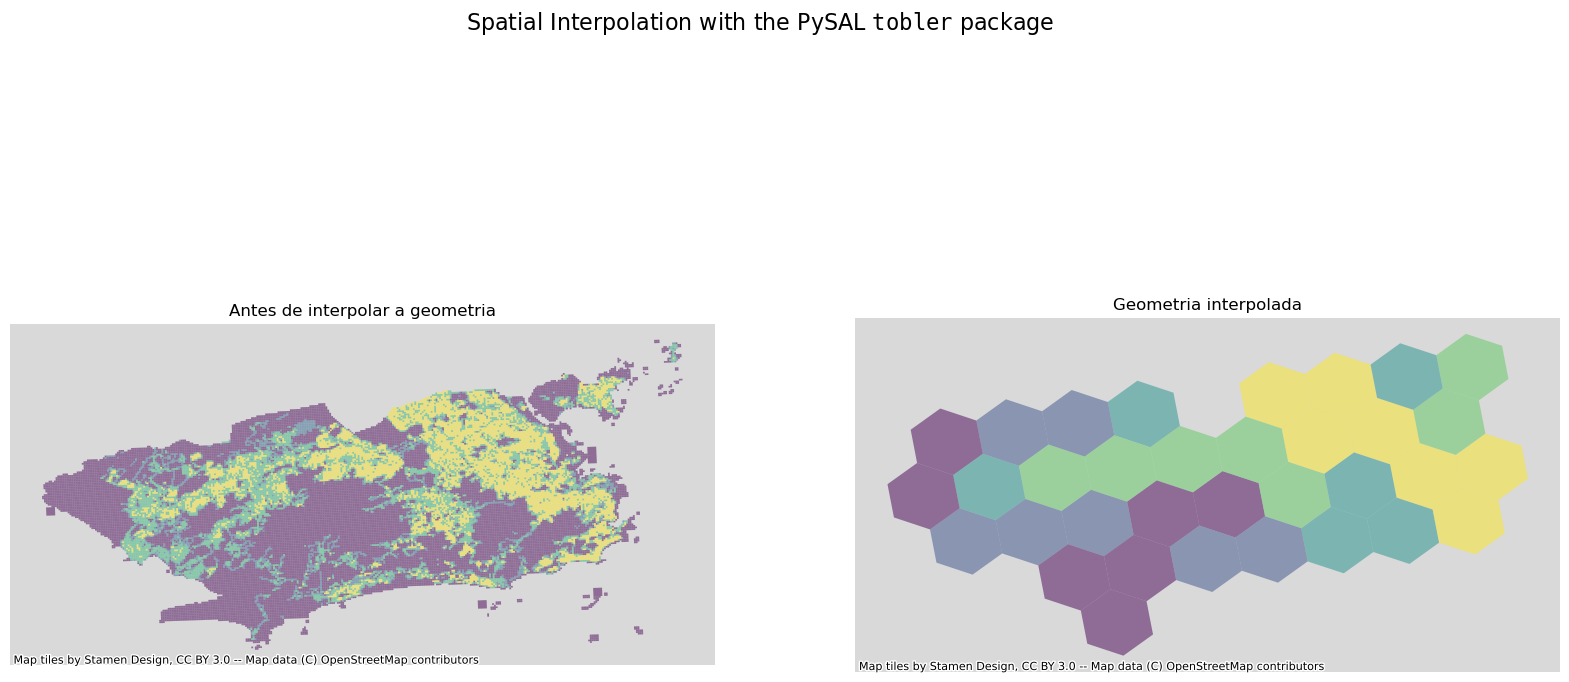

In [24]:
#É necessário fazer uma importação.
import mapclassify
fig, axs = plt.subplots(1,2, figsize=(20,10))
resultado.plot('MASC', scheme='quantiles', alpha=0.5, ax=axs[0])
#Aqui é só um plote (Agora com a interpolação dos dados do MASC).
dc_hex_interpolated.plot('MASC', scheme='quantiles', alpha=0.5, ax=axs[1])
#os títulos dos mapas.
axs[0].set_title('Antes de interpolar a geometria')
axs[1].set_title('Geometria interpolada')

for ax in axs:
    ctx.add_basemap(ax=ax, source=ctx.providers.Stamen.TonerLite)
    ax.axis('off')
plt.suptitle('Spatial Interpolation with the PySAL $\mathtt{tobler}$ package', fontsize=16)